# <a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science</a>
# <a href=https://www.ramp.studio/problems/covertype>RAMP</a> on predicting forest type

<i> Balázs Kégl (LAL/CNRS), Alex Gramfort (INRIA)</i>

In [1]:
%matplotlib inline
import imp
import numpy as np
import pandas as pd
import pylab as plt

## Introduction

## Fetch the data and load it in pandas

First we load `problem.py` that parameterizes the challenge. It contains some objects taken off the shelf from `ramp-workflow` (e.g., `Predictions` type, scores, and data reader). 

In [2]:
problem = imp.load_source('', 'problem.py')

`get_train_data` loads the training data and returns an `pandas` object (input) and a `np.array` object (output).

In [3]:
X_df, y_array = problem.get_train_data()

To speed up the computation we'll just pick a subset of the data

In [4]:
from sklearn.model_selection import train_test_split
X_df, _, y_array, _ = train_test_split(
    X_df, y_array, train_size=1 / 20., stratify=y_array, random_state=42)

In [5]:
X_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
184461,0.475738,0.419444,0.318182,0.211167,0.355297,0.231839,0.948819,0.921260,0.440945,0.314652,...,0,0,0,0,0,0,0,0,0,0
73845,0.494247,0.147222,0.333333,0.000000,0.223514,0.049178,0.889764,0.740157,0.334646,0.231005,...,0,0,0,0,0,0,0,0,0,0
360466,0.550275,0.169444,0.348485,0.143880,0.268734,0.643249,0.913386,0.732283,0.295276,0.278963,...,0,0,0,0,0,0,0,0,0,0
196910,0.230615,0.861111,0.181818,0.257695,0.441860,0.153435,0.736220,0.913386,0.728346,0.067057,...,0,0,0,0,0,0,0,0,0,0
359752,0.564282,0.147222,0.393939,0.060845,0.231266,0.128144,0.881890,0.692913,0.279528,0.314373,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,...,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000
mean,0.549890,0.437819,0.213108,0.192102,0.283369,0.331154,0.834181,0.880166,0.563607,0.274254,...,0.044105,0.089662,0.077937,0.002313,0.003066,0.000269,0.000377,0.026248,0.025172,0.015275
std,0.140448,0.312492,0.112656,0.149649,0.074517,0.220839,0.104996,0.077861,0.150250,0.181091,...,0.205334,0.285705,0.268079,0.048037,0.055287,0.016397,0.019401,0.159876,0.156652,0.122649
min,0.018009,0.000000,0.000000,0.000000,0.042636,0.000000,0.236220,0.346457,0.000000,0.004182,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.475738,0.163889,0.136364,0.077309,0.232558,0.154560,0.779528,0.838583,0.472441,0.143733,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.568284,0.361111,0.196970,0.156049,0.262274,0.281298,0.854331,0.889764,0.566929,0.237697,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.652326,0.733333,0.272727,0.274875,0.312661,0.468877,0.909449,0.933071,0.665354,0.353548,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.997499,1.000000,0.863636,0.931997,0.994832,0.992132,1.000000,1.000000,0.996063,0.983689,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
X_df.dtypes

Elevation                             float64
Aspect                                float64
Slope                                 float64
Horizontal_Distance_To_Hydrology      float64
Vertical_Distance_To_Hydrology        float64
Horizontal_Distance_To_Roadways       float64
Hillshade_9am                         float64
Hillshade_Noon                        float64
Hillshade_3pm                         float64
Horizontal_Distance_To_Fire_Points    float64
Wilderness_Area1                        int64
Wilderness_Area2                        int64
Wilderness_Area3                        int64
Wilderness_Area4                        int64
Soil_Type1                              int64
Soil_Type2                              int64
Soil_Type3                              int64
Soil_Type4                              int64
Soil_Type5                              int64
Soil_Type6                              int64
Soil_Type7                              int64
Soil_Type8                        

In [8]:
full_data_df = X_df.copy()
full_data_df['Cover_Type'] = y_array
full_data_df.groupby('Cover_Type').count()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,6779,6779,6779,6779,6779,6779,6779,6779,6779,6779,...,6779,6779,6779,6779,6779,6779,6779,6779,6779,6779
2,9065,9065,9065,9065,9065,9065,9065,9065,9065,9065,...,9065,9065,9065,9065,9065,9065,9065,9065,9065,9065
3,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,...,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144
4,88,88,88,88,88,88,88,88,88,88,...,88,88,88,88,88,88,88,88,88,88
5,304,304,304,304,304,304,304,304,304,304,...,304,304,304,304,304,304,304,304,304,304
6,556,556,556,556,556,556,556,556,556,556,...,556,556,556,556,556,556,556,556,556,556
7,656,656,656,656,656,656,656,656,656,656,...,656,656,656,656,656,656,656,656,656,656


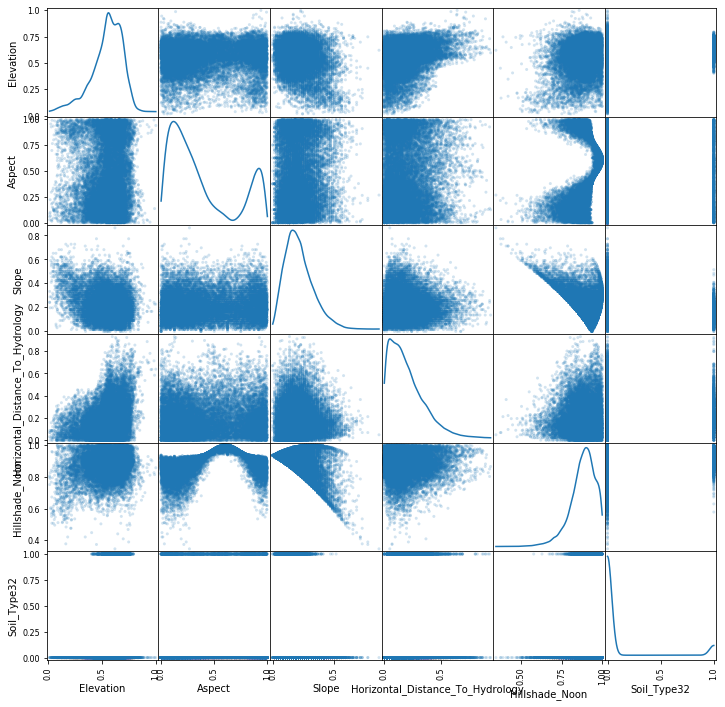

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(
    X_df.get(
        ['Elevation', 'Aspect', 'Slope',
         'Horizontal_Distance_To_Hydrology',
         'Hillshade_Noon', 'Soil_Type32']),
    alpha=0.2, figsize=(12, 12), diagonal='kde');

<Figure size 864x576 with 0 Axes>

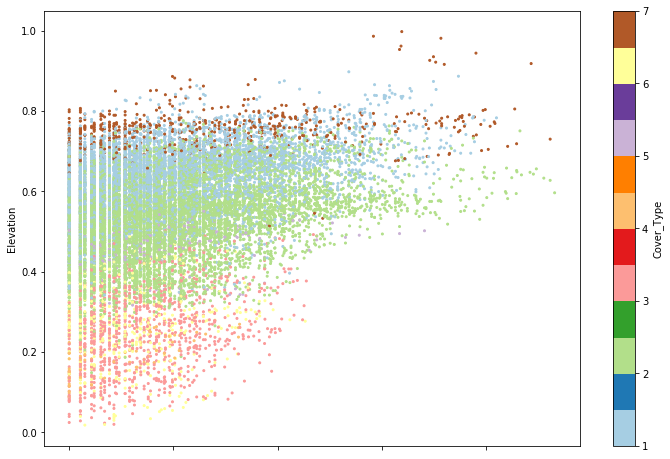

In [10]:
plt.figure(figsize=(12, 8));
full_data_df.plot(
    kind='scatter', x='Horizontal_Distance_To_Hydrology',
    y='Elevation', c='Cover_Type', s=4, cmap=plt.cm.Paired,
    figsize=(12, 8));

### A linear regressor baseline

In [11]:
X_array = X_df.values

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_array, y_array, test_size=0.2, random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(solver='liblinear')

scores = cross_val_score(
    clf, X_train, y_train, cv=5, scoring='accuracy')
print("RMSE: {:.4f} +/- {:.4f}".format(
    np.mean(scores), np.std(scores)))

RMSE: 0.7105 +/- 0.0032


## Random Forests

In [14]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = 10
max_depth = 10
max_features = 10
clf = RandomForestClassifier(
    n_estimators=n_estimators, max_depth=max_depth, max_features=max_features)

scores = cross_val_score(
    clf, X_train, y_train, cv=5, scoring='accuracy')
print("RMSE: {:.4f} +/- {:.4f}".format(
    np.mean(scores), np.std(scores)))

RMSE: 0.7442 +/- 0.0077


## Variable permutation importances

In [15]:
from sklearn.inspection import permutation_importance

clf.fit(X_train, y_train)
feature_importances = permutation_importance(
    clf, X_train, y_train, n_repeats=10
)

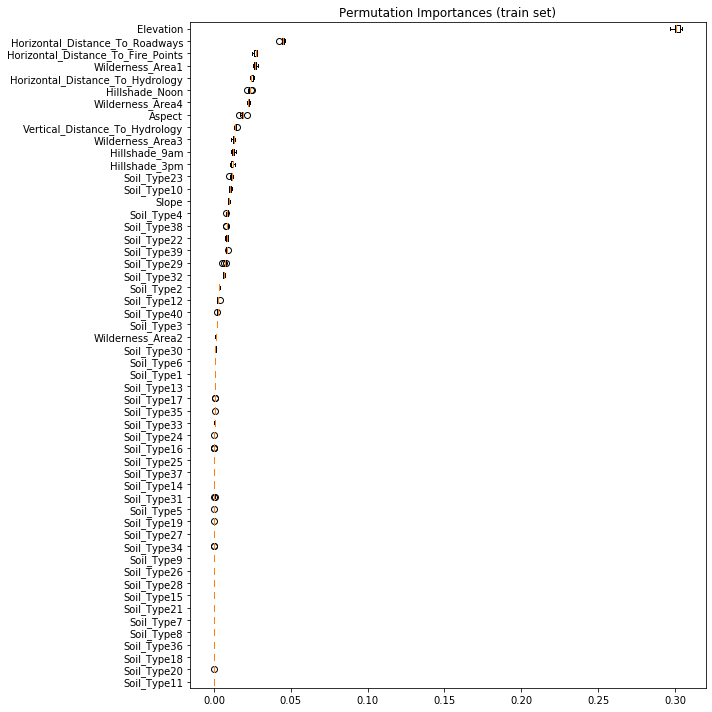

In [16]:
sorted_idx = feature_importances.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(feature_importances.importances[sorted_idx].T,
           vert=False, labels=X_df.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

## Building predictive models

In [17]:
%%file submissions/starting_kit/estimator.py

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


def get_estimator():
    return make_pipeline(
        StandardScaler(),
        LogisticRegression(C=1., solver='liblinear')
    )

Overwriting submissions/starting_kit/estimator.py


In [18]:
%run submissions/starting_kit/estimator.py

<Figure size 432x288 with 0 Axes>

In [19]:
clf = get_estimator()

In [20]:
score_type = problem.score_types[0]

In [21]:
# We need to convert y_proba into winning label names
y_pred_labels = clf.fit(X_train, y_train).predict(X_train)
score = score_type(y_train, y_pred_labels)
score

0.7174746184360923

In [22]:
X_test_df, y_test_array = problem.get_test_data()

y_pred_labels = clf.predict(X_test_df)
score = score_type(y_test_array, y_pred_labels)
score

0.7119037886448226

## Local testing (before submission)

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. For this we provide a unit test. Note that the test runs on your files in [`submissions/starting_kit`](http://localhost:8890/tree/submissions/starting_kit).

First `pip install ramp-workflow` or install it from the [github repo](https://github.com/paris-saclay-cds/ramp-workflow). Make sure that the python files `feature_extractor.py` and `classifier.py` are in the  [`submissions/starting_kit`](http://localhost:8890/tree/submissions/starting_kit) folder, and the data `train.csv` and `test.csv` are in [`data`](http://localhost:8890/tree/data). Then run

```ramp_test_submission```

If it runs and print training and test errors on each fold, then you can submit the code.

In [23]:
#!ramp-test --submission=starting_kit --quick-test